In [1]:
!pip install rasterio numpy scipy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 39.4 MB/s eta 0:00:00


/tmp/ipython-input-2-2164252737.py:38: RuntimeWarning: Mean of empty slice
  np.nanmean(grav[(r >= rbins[i]) & (r < rbins[i+1])])


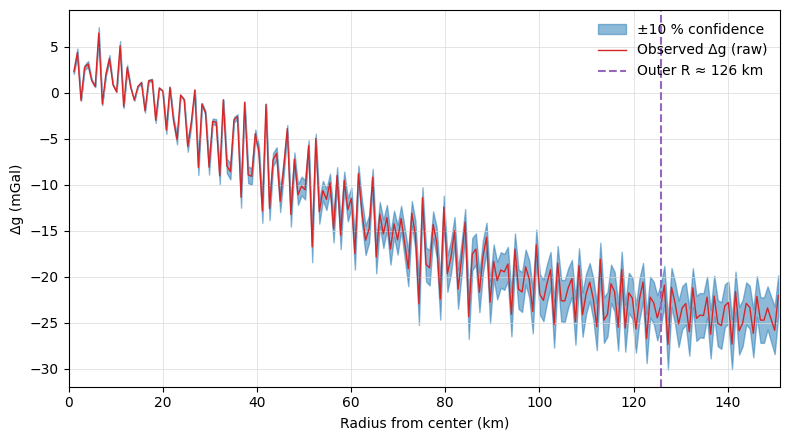

In [2]:


import numpy as np
import rasterio
import matplotlib.pyplot as plt


center_lon, center_lat = 70.2333, 18.6667
R_i = 12.592 / 2
R_o = 251.844 / 2
n_bins = 200


src = rasterio.open("gravity.tif")
g = src.read(1).astype(float)
g[g == src.nodata] = np.nan


rows = np.arange(src.height)
cols = np.arange(src.width)
cols2d, rows2d = np.meshgrid(cols, rows)
lons, lats = rasterio.transform.xy(src.transform, rows2d, cols2d)
lons = np.array(lons)
lats = np.array(lats)



dx = (lons - center_lon) * 111.0 * np.cos(np.deg2rad(center_lat))
dy = (lats - center_lat) * 111.0
r2d = np.sqrt(dx**2 + dy**2)


r = r2d.ravel()
grav = g.ravel()


rbins = np.linspace(0, R_o * 1.2, n_bins + 1)
rcent = 0.5 * (rbins[:-1] + rbins[1:])
obs_prof = [
    np.nanmean(grav[(r >= rbins[i]) & (r < rbins[i+1])])
    for i in range(n_bins)
]


obs_prof = np.array(obs_prof)
lower = obs_prof * 0.90
upper = obs_prof * 1.10


fig, ax = plt.subplots(figsize=(8, 4.5))

ax.fill_between(rcent, lower, upper,
                color="tab:blue", alpha=0.5,
                label="±10 % confidence")

ax.plot(rcent, obs_prof, color="tab:red", linewidth=1,
        label="Observed Δg (raw)")

ax.axvline(R_o, color="C4", linestyle="--", label=f"Outer R ≈ {R_o:.0f} km")


ax.set_xlim(0, R_o * 1.2)
ax.set_xlabel("Radius from center (km)")
ax.set_ylabel("Δg (mGal)")
ax.grid(color="0.85", linewidth=0.5)
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()
plt.show()


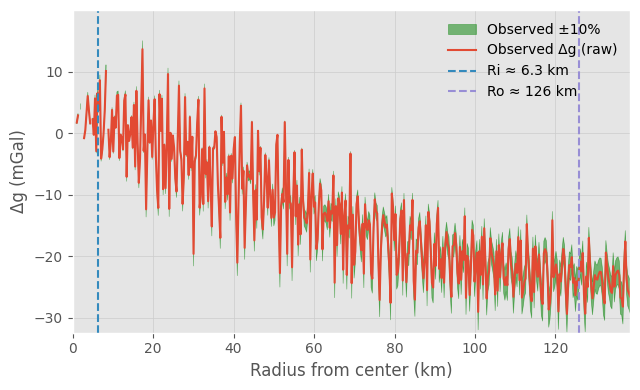

In [3]:


import warnings
warnings.filterwarnings("ignore", message="Mean of empty slice")

import rasterio
import numpy as np
import matplotlib.pyplot as plt


gravity_file = "gravity.tif"
center_lon, center_lat = 70.2333, 18.6667
Ri = 12.592 / 2
Ro = 251.844 / 2



with rasterio.open(gravity_file) as src:
    grav = src.read(1).astype(float)
    grav[grav == src.nodata] = np.nan
    transform = src.transform
    height, width = grav.shape


rows = np.arange(height)
cols = np.arange(width)
cols2d, rows2d = np.meshgrid(cols, rows)
lons2d, lats2d = rasterio.transform.xy(transform, rows2d, cols2d)
lons = np.array(lons2d)
lats = np.array(lats2d)


dx = (lons - center_lon) * 111.0 * np.cos(np.deg2rad(center_lat))
dy = (lats - center_lat) * 111.0
r2d = np.sqrt(dx**2 + dy**2)


r = r2d.ravel()
g = grav.ravel()


n_bins = 500
rbins = np.linspace(0, Ro * 1.2, n_bins + 1)
rcent = 0.5 * (rbins[:-1] + rbins[1:])
obs_prof = np.array([
    np.nanmean(g[(r >= rbins[i]) & (r < rbins[i+1])])
    for i in range(n_bins)
])


obs_lo = obs_prof * 0.90
obs_hi = obs_prof * 1.10


plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(6.5, 4))


ax.fill_between(rcent, obs_lo, obs_hi, color='g', alpha=0.5,
                label='Observed ±10%')


ax.plot(rcent, obs_prof, '-C0', lw=1.5, label='Observed Δg (raw)')


ax.axvline(Ri, color='C1', ls='--', lw=1.5, label=f'Ri ≈ {Ri:.1f} km')
ax.axvline(Ro, color='C2', ls='--', lw=1.5, label=f'Ro ≈ {Ro:.0f} km')


ax.set_xlabel("Radius from center (km)")
ax.set_ylabel("Δg (mGal)")
ax.set_xlim(0, Ro * 1.1)
ymin, ymax = np.nanmin(obs_lo) - 5, np.nanmax(obs_hi) + 5
ax.set_ylim(ymin, ymax)
ax.grid(color='0.8', lw=0.5)
ax.legend(loc='upper right', frameon=False)

plt.tight_layout()
plt.show()
